In [19]:
import torch; import numpy as np; import matplotlib.pyplot as plt; import matplotlib
import ipywidgets as widgets
from ipywidgets import interactive, FloatSlider
from IPython.display import display

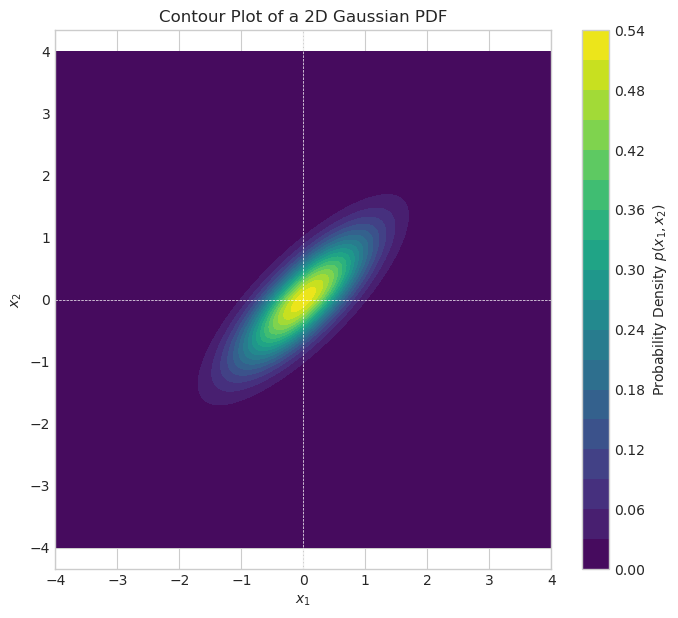

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set plot style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

#################################################################
## Part 1: 2D Gaussian Distribution
#################################################################

# Define the mean and a fixed covariance matrix for the Gaussian
mean_x = np.array([0, 0])
cov_x = np.array([[1.0, 0.8], 
                  [0.8, 1.0]])/2

x1_range = np.linspace(-4, 4, 400)
x2_range = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
pos = np.dstack((X1, X2))

gaussian_dist = multivariate_normal(mean_x, cov_x)
p = gaussian_dist.pdf(pos)

plt.figure(figsize=(8, 7))
contour1 = plt.contourf(X1, X2, p, levels=20, cmap='viridis')
plt.colorbar(contour1, label='Probability Density $p(x_1, x_2)$')
plt.title('Contour Plot of a 2D Gaussian PDF')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='white', linestyle='--', linewidth=0.5)
plt.axvline(0, color='white', linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.show()


In [41]:
def gaussian_phi(x1,x2,phi1,phi2, cov= cov_x):
    mean = np.array([phi1, phi2])
    pos = np.dstack((x1, x2))
    y = 1-multivariate_normal(mean, cov).pdf(pos)
    return y

def plot_gaussian_phi_interactive(phi1, phi2):
    """Plots the gaussian_phi function for given phi values."""
    # 1. Calculate the grid using the updated function
    cov = cov_x
    z_grid = gaussian_phi(X1, X2, phi1, phi2, cov)
    
    # 2. Create the plot
    fig = plt.figure(figsize=(9, 7.5))
    ax = fig.add_subplot(1, 1, 1)
    
    # 3. Use contourf to plot the result
    # We fix the color limits to be consistent across slider moves
    max_pdf = multivariate_normal([0,0], cov).pdf([0,0])
    vmin = 1 - max_pdf
    vmax = 1.0
    contour = ax.contourf(X1, X2, z_grid, levels=20, cmap='plasma_r', vmin=vmin, vmax=vmax)
    
    # 4. Add a color bar and labels
    cbar = fig.colorbar(contour)
    cbar.set_label('Value of y(x, $\phi$)', fontsize=12)
    
    # 5. Add a marker for the center of the dip (phi1, phi2)
    ax.plot(phi1, phi2, 'w+', markersize=12, markeredgewidth=2, label=f'Center: ({phi1:.2f}, {phi2:.2f})')
    
    # 6. Add titles and labels
    ax.set_title(f'Plot of y = 1 - Gaussian for $\phi_1={phi1:.2f}, \phi_2={phi2:.2f}$', fontsize=14)
    ax.set_xlabel('$x_1$', fontsize=12)
    ax.set_ylabel('$x_2$', fontsize=12)
    ax.set_xlim(x1_range.min(), x1_range.max())
    ax.set_ylim(x2_range.min(), x2_range.max())
    ax.legend(loc='upper right')
    ax.axis('equal')
    
    plt.show()

phi1_slider = FloatSlider(
    value=0.0,
    min=-3.0,
    max=3.0,
    step=0.1,
    description=r'$\phi_1$:',
    continuous_update=False, # Update only on release for smoother experience
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

phi2_slider = FloatSlider(
    value=0.0,
    min=-3.0,
    max=3.0,
    step=0.1,
    description=r'$\phi_2$:',
    continuous_update=False,
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

# --- Link the sliders to the plotting function and display ---
interactive_plot = interactive(plot_gaussian_phi_interactive, phi1=phi1_slider, phi2=phi2_slider)
display(interactive_plot)

<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/disk/users/lprate/mytmp/ipykernel_315036/3909451965.py:26: SyntaxWarning: invalid escape sequence '\p'
  cbar.set_label('Value of y(x, $\phi$)', fontsize=12)
/disk/users/lprate/mytmp/ipykernel_315036/3909451965.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f'Plot of y = 1 - Gaussian for $\phi_1={phi1:.2f}, \phi_2={phi2:.2f}$', fontsize=14)
/disk/users/lprate/mytmp/ipykernel_315036/3909451965.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f'Plot of y = 1 - Gaussian for $\phi_1={phi1:.2f}, \phi_2={phi2:.2f}$', fontsize=14)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='$\\phi_1$:', layout=Layout(…

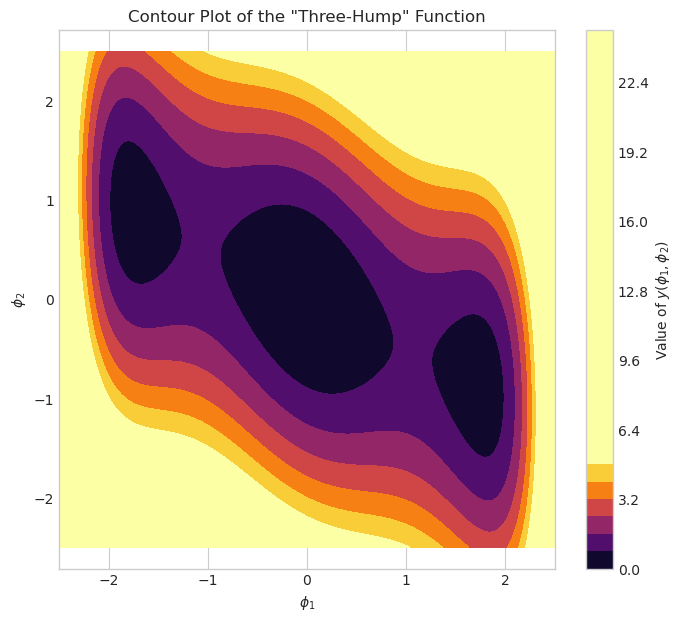

In [43]:


phi1_range = np.linspace(-2.5, 2.5, 500)
phi2_range = np.linspace(-2.5, 2.5, 500)
PHI1, PHI2 = np.meshgrid(phi1_range, phi2_range)
def three_hump_camel_func(p1, p2):
    term1 = 2 * p1**2
    term2 = -1.05 * p1**4
    term3 = p1**6 / 6
    term4 = p1 * p2
    term5 = p2**2
    return term1 + term2 + term3 + term4 + term5

Z = three_hump_camel_func(PHI1, PHI2)

plt.figure(figsize=(8, 7))
contour2 = plt.contourf(PHI1, PHI2, Z, levels=30, cmap='inferno', vmin=0.0, vmax=5.0)
plt.colorbar(contour2, label=r'Value of $y(\phi_1, \phi_2)$')
plt.title('Contour Plot of the "Three-Hump" Function')
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\phi_2$')
plt.axis('equal')
plt.show()

In [47]:
def plot_product_function(phi1, phi2):
    """
    Calculates y(phi) and plots the product f(x) = y(phi) * p(x).
    """
    z1 = three_hump_camel_func(phi1, phi2)
    z2 = three_hump_camel_func(phi2, phi1)
    
    y_val = gaussian_phi(X1, X2, z1,z2)
    
    f = y_val * p
    
    # 4. Create the plot
    fig = plt.figure(figsize=(9, 7.5))
    ax = fig.add_subplot(1, 1, 1)
    contour = ax.contourf(X1, X2, f, levels=20, cmap='viridis', vmin=0, vmax=p.max())
    cbar = fig.colorbar(contour)
    cbar.set_label(r'$f(x_1, x_2) = y(\phi) \cdot p(x_1, x_2)$', fontsize=12)
    ax.set_title(rf'Product Function for $\phi_1={phi1:.2f}, \phi_2={phi2:.2f}', fontsize=14)
    ax.set_xlabel(r'$x_1$', fontsize=12)
    ax.set_ylabel(r'$x_2$', fontsize=12)
    ax.axis('equal')
    plt.show()

phi1_slider = FloatSlider(
    value=0.0,
    min=-2.5,
    max=2.5,
    step=0.05,
    description=r'$\phi_1$:',
    continuous_update=True,
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

phi2_slider = FloatSlider(
    value=0.0,
    min=-2.5,
    max=2.5,
    step=0.05,
    description=r'$\phi_2$:',
    continuous_update=True,
    readout_format='.2f',
    layout=widgets.Layout(width='500px')
)

# --- Link the sliders to the plotting function ---
interactive_plot = interactive(plot_product_function, phi1=phi1_slider, phi2=phi2_slider)

# --- Display the interactive plot ---
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='$\\phi_1$:', layout=Layout(width='500px'), max=2.5, …